<a href="https://colab.research.google.com/github/eliasingi12/DEEP_U-net_Project/blob/master/DEEP_u_net_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upload 
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
# https://github.com/eliasingi12/DEEP_U-net_Project/blob/master/DRIVE.tgz

In [0]:
# DRIVE dataset test path
# !ls "/content/drive/My Drive/DRIVE/test"

In [0]:
# DRIVE dataset training path
# !ls "/content/drive/My Drive/DRIVE/training"

Populating the interactive namespace from numpy and matplotlib


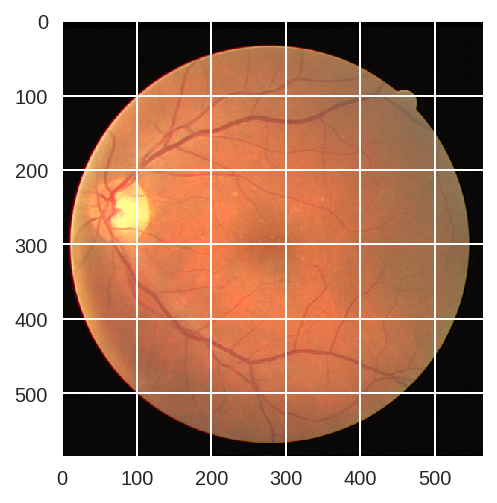

In [19]:
%pylab inline
import matplotlib.image as mpimg

img=mpimg.imread('/content/drive/My Drive/DRIVE/training/images/21_training.tif')
imgplot = plt.imshow(img)
plt.show()

In [3]:
import os
import random

import cv2
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras import regularizers
from keras.models import Sequential
from keras.layers.core import Dense, SpatialDropout1D
from keras.optimizers import SGD, rmsprop, Adam, Nadam
from sklearn.metrics import classification_report
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation, Dropout
from keras.layers.normalization import BatchNormalization


import matplotlib.pyplot as plt

random_seed = 42   # include for reproducability

Using TensorFlow backend.


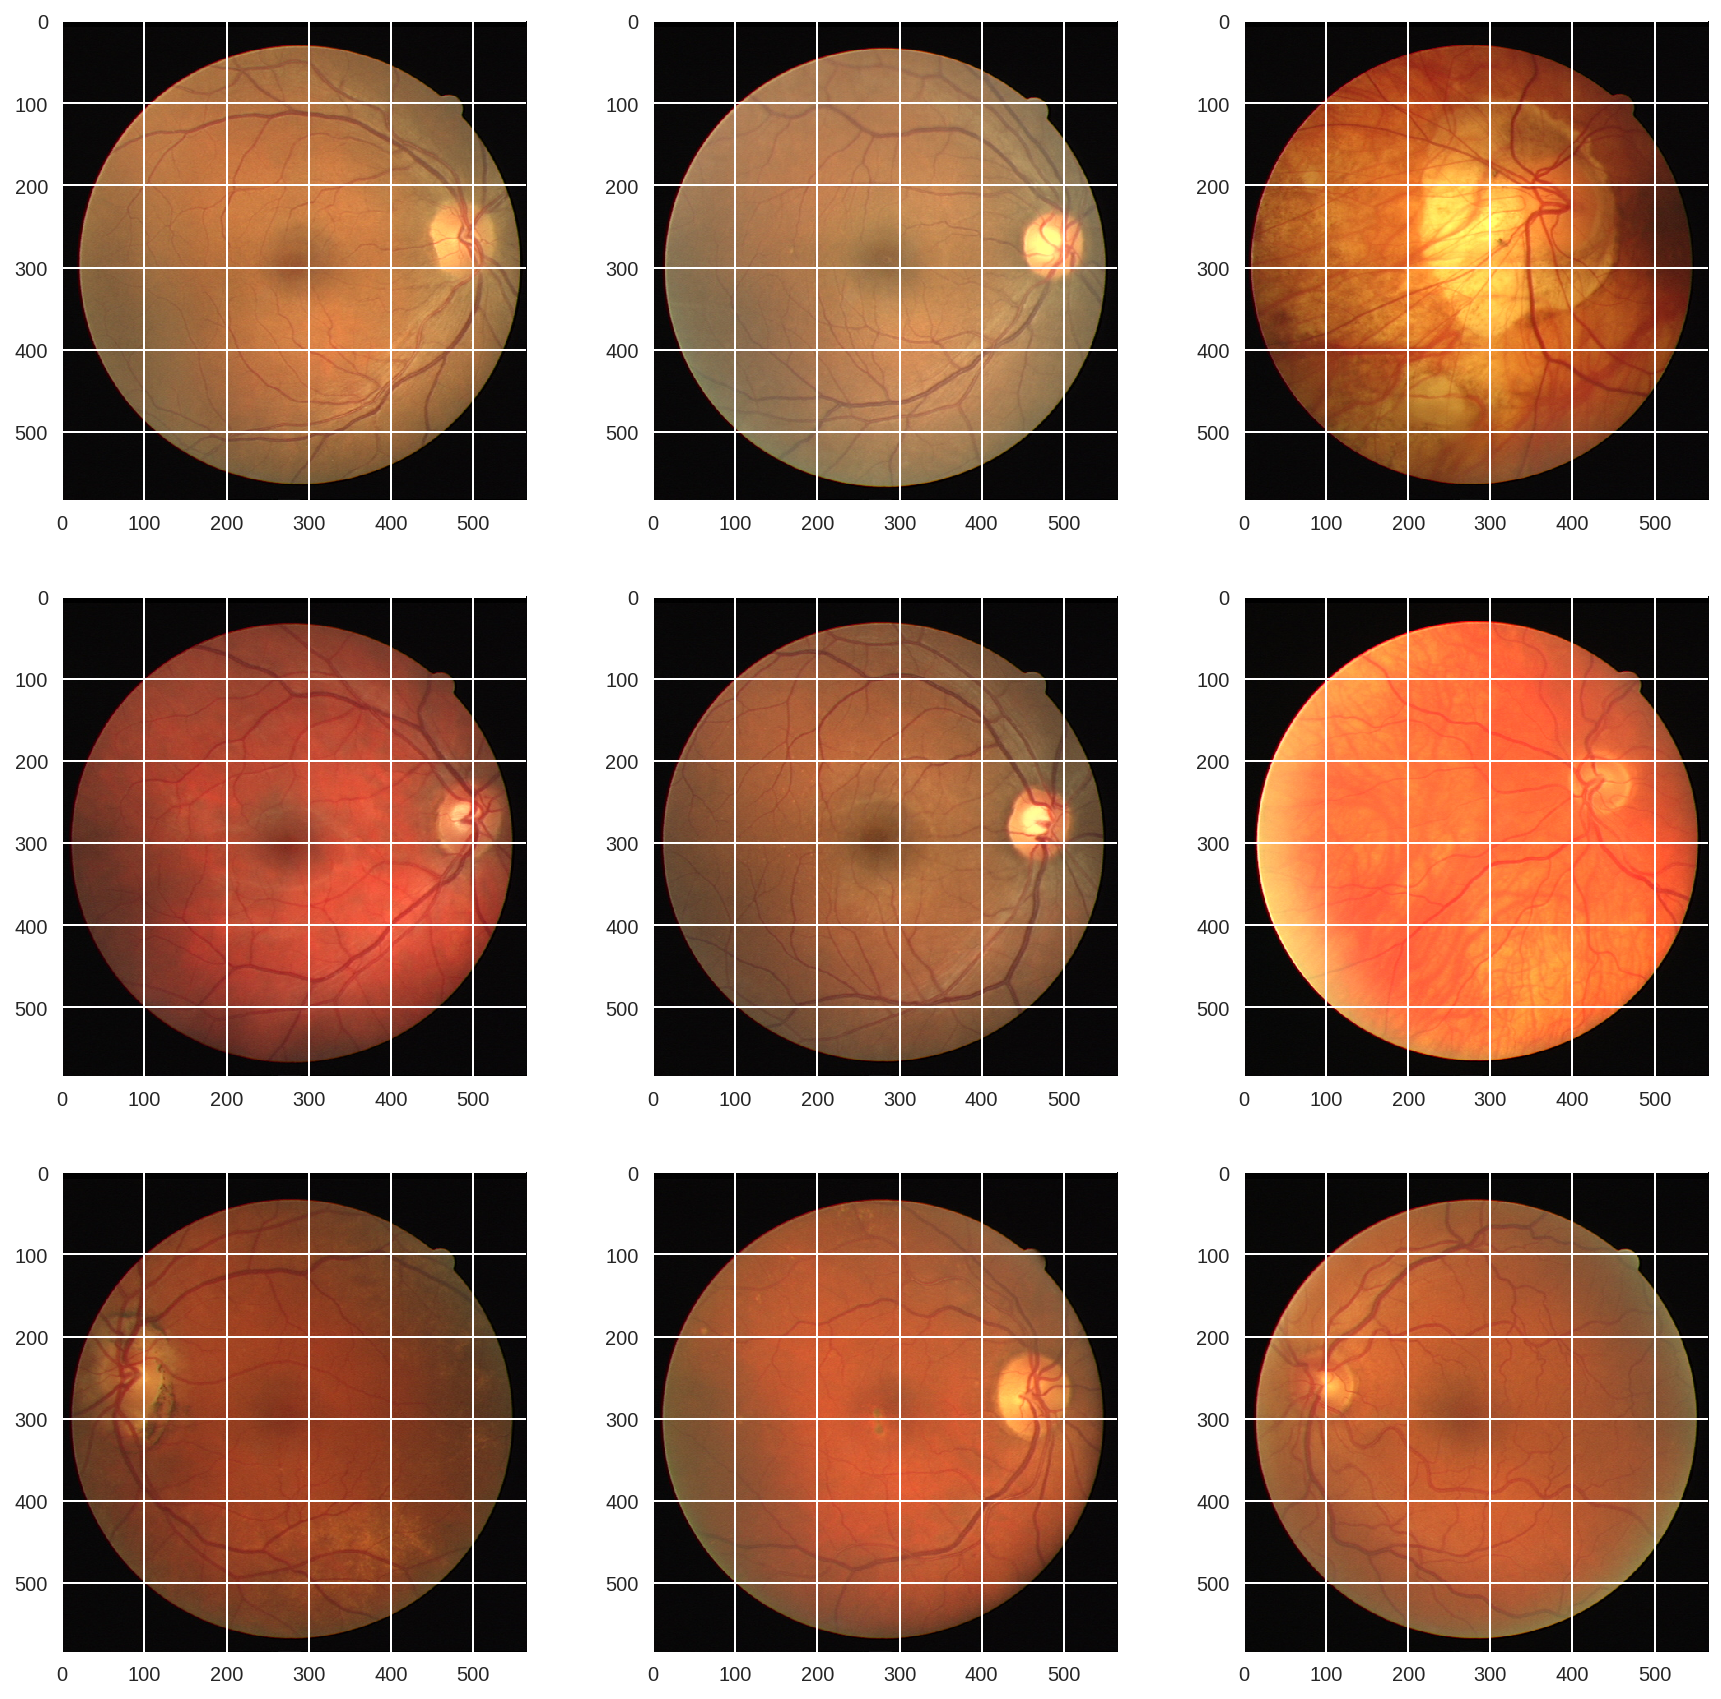

In [29]:
# Read in the file paths of the images to use for the training.
sz = 64
image_paths = list()
pre_dir = "/content/drive/My Drive/DRIVE/"

args = {}
args["training_imgs"] = pre_dir + "training/images/"

for (dirpath, dirnames, filenames) in os.walk(args["training_imgs"]):
    for file in filenames:
        if '.tif' in file and not file.startswith('.'):
              image_paths.append(os.path.join(dirpath, file))
                
random.seed(random_seed)
random.shuffle(image_paths)


def show_images(imgs, grid_size=3):
  f, axarr = plt.subplots(grid_size,grid_size, figsize=(15, 15))
  for i in range(grid_size):
    for j in range(grid_size):
      axarr[i,j].imshow(imgs[i*grid_size+j])
  plt.show()
  

input_data   = []
input_labels = []
original_imgs = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_imgs.append(image)
    input_data.append(image)
    label = image_path.split(os.path.sep)[-2]
    input_labels.append(label)
    
show_images(original_imgs)

In [31]:

# Possible ways to convert image pixels to array values...
# Also lab2 from Yngvi ?

import numpy as np
import matplotlib.pyplot as plt

import skimage.io
import skimage.exposure
import skimage.filters
import skimage.morphology

import seaborn as sns

# Magic function used to make this Jupyter notebook
%matplotlib inline

# This enables high res graphics inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks (without grid for image viewing)
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# Load images as NumPy array
grat_im = skimage.io.imread('/content/drive/My Drive/DRIVE/training/images/21_training.tif')

# Show that grat_im is a NumPy array
print('grat_im is a', type(grat_im))

# Show that the data type is unsigned int
print('Data type is', grat_im.dtype)

# Let's look at grat_im (only works in the IPython console)
grat_im

grat_im is a <class 'numpy.ndarray'>
Data type is uint8


array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 9,  9, 11],
        [ 8,  8, 10],
        [ 7,  7,  7],
        ...,
        [ 7,  7,  5],
        [ 7,  7,  5],
        [ 8,  7,  5]],

       [[ 7,  7,  7],
        [ 7,  7,  7],
        [ 7,  7,  7],
        ...,
        [ 7,  7,  7],
        [ 7,  7,  7],
        [ 6,  6,  6]],

       [[ 7,  7,  7],
        [ 6,  6,  6],
        [ 8,  6,  7],
        ...,
        [ 0,  0,  0],
        [ 1,  1,  1],
        [ 1,  1,  1]]], dtype=uint8)

In [0]:
#